<a href="https://colab.research.google.com/github/owlajm/-/blob/main/20413_%EC%95%88%EC%A0%95%EB%AF%BC_%EC%88%98%ED%95%99_%EC%88%98%ED%96%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

분석할 다항함수를 입력하세요 (예: x**4 - 4*x**3 + 6*x**2): x**3-3*x**2+4
원래 함수: f(x) = x**3 - 3*x**2 + 4
극댓값: [(0.0, 4.0)]
극솟값: [(2.0, 0.0)]
변곡점: [(1.0, 2.0)]


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54632 (\N{HANGUL SYLLABLE HAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51656 (\N{HANGUL SYLLABLE JIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

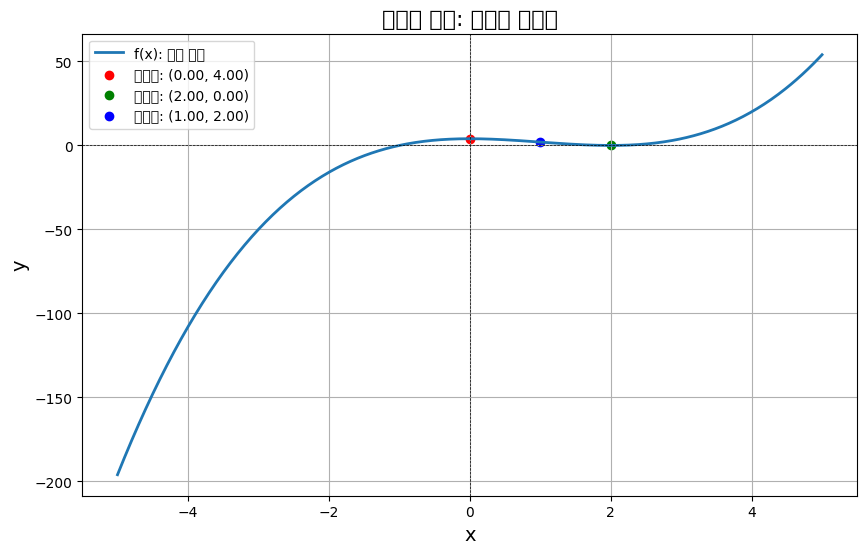

In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

# 심볼릭 변수 선언
x = sp.Symbol('x')

# 함수 입력
function_input = input("분석할 다항함수를 입력하세요 (예: x**4 - 4*x**3 + 6*x**2): ")
f = sp.sympify(function_input)

# 1차 도함수 계산
f_prime = sp.diff(f, x)

# 도함수의 근 계산 (극값 찾기)
critical_points = sp.solveset(f_prime, x, domain=sp.S.Reals)  # 극값 후보

# 극값 계산 및 분류
max_points = []  # 극댓값 리스트
min_points = []  # 극솟값 리스트

delta = 1e-2  # 부호 변화를 확인할 작은 값
for point in critical_points:
    if point.is_real:
        value = f.subs(x, point)
        # 도함수의 부호 변화 확인
        left = f_prime.subs(x, point - delta)
        right = f_prime.subs(x, point + delta)
        if left > 0 and right < 0:  # 극댓값 조건
            max_points.append((float(point), float(value)))
        elif left < 0 and right > 0:  # 극솟값 조건
            min_points.append((float(point), float(value)))

# 변곡점 찾기
f_double_prime = sp.diff(f_prime, x)
inflection_candidates = sp.solveset(f_double_prime, x, domain=sp.S.Reals)
inflection_points = []
for point in inflection_candidates:
    if point.is_real:
        left_second = f_double_prime.subs(x, point - delta)
        right_second = f_double_prime.subs(x, point + delta)
        if left_second * right_second < 0:  # 부호가 변하면 변곡점
            inflection_points.append((float(point), float(f.subs(x, point))))

# 결과 출력
print(f"원래 함수: f(x) = {f}")
print(f"극댓값: {max_points}")
print(f"극솟값: {min_points}")
print(f"변곡점: {inflection_points}")

# 함수 그래프 그리기
# SymPy를 numpy로 변환
f_lambdified = sp.lambdify(x, f, modules=["numpy"])

# x 값 범위 설정
x_vals = np.linspace(-5, 5, 500)
y_vals = f_lambdified(x_vals)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label="f(x): 원래 함수", linewidth=2)

# 극댓값과 극솟값 표시
for point in max_points:
    plt.scatter(point[0], point[1], color="red", label=f"극댓값: ({point[0]:.2f}, {point[1]:.2f})")
for point in min_points:
    plt.scatter(point[0], point[1], color="green", label=f"극솟값: ({point[0]:.2f}, {point[1]:.2f})")

# 변곡점 표시
for point in inflection_points:
    plt.scatter(point[0], point[1], color="blue", label=f"변곡점: ({point[0]:.2f}, {point[1]:.2f})")

plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.title("함수의 성질: 극값과 변곡점", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.legend()
plt.grid()
plt.show()